In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Basetrain = np.load("basetrain.npy")
Labeltrain = np.load("labeltrain.npy")
Basetest = np.load("basetest.npy")
Labeltest = np.load("labeltest.npy")
Basetrain = Basetrain.T
Basetest = Basetest.T
Basetrain = Basetrain / 255
Basetest = Basetest / 255

In [3]:
print("Base d'apprentissage : {} exemples".format(Basetrain.shape[0]))
print("Base de test : {} exemples".format(Basetest.shape[0]))

Base d'apprentissage : 10000 exemples
Base de test : 2000 exemples


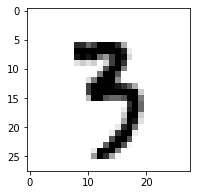

In [4]:
plt.figure(1, figsize=(3,3))
plt.imshow(Basetest[1,:].reshape(28,28),cmap = plt.cm.gray_r)
plt.show()

In [212]:
def mlp1def(n,m):
    #xavier-initialization
    return np.random.uniform(low=-np.sqrt(6/(n+m)),high=np.sqrt(6/(n+m)),size=(m,n+1))

def sigmo(v):
    np.place(v,v > 100,100)
    np.place(v, v < -100, -100)
    v2 = np.exp(-2*v)
    return (1-v2)/(1+v2)

def mlp1run(x,w):
    x = np.concatenate((np.ones((x.shape[0],1)),x),axis = 1)
    return sigmo(np.matmul(x,w))

def mlpclass(y):
    return np.argmax(y,axis=1)

def compute_score(Label, Label1D):
    score = np.sum(np.equal(Label,Label1D))
    rate = score/len(Label)
    return score,rate

def sigmop(v):
    return 1-sigmo(v)**2

def label2target(c, nb_classes):
    nb_examples = len(c)
    label_array = -1*np.ones((nb_examples,nb_classes))
    for i in range(nb_examples):
        label = c[i]
        label_array[i,label] = 1
    return label_array

def mlperror(y, target):
    return y - target

def sqrerror(error):
    return 0.5*np.mean(np.square(error))

def mlp1train(x, target, w, lr, it):
    x = np.concatenate((np.ones((x.shape[0],1)),x),axis = 1)
    sqr_error = np.zeros((it,1))
    for iteration in range(it):
        v = np.matmul(x,w)
        y = sigmo(v)
        predictions = mlpclass(y)
        error = mlperror(label2target(predictions,10), label2target(target,10))
        sqr_error[iteration] = sqrerror(error)
        delta = error*sigmop(v)
        Qij = np.matmul(x.T,delta)
        w = w - lr*Qij       
    plt.plot(list(range(it)),sqr_error)
    return w

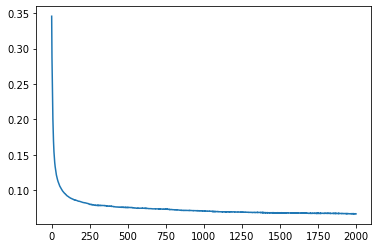

In [226]:
nb_features = Basetrain.shape[1]
nb_classes = len(np.unique(Labeltrain))
# Initialization
w = mlp1def(nb_features,nb_classes)
w = w.T
# Training
w = mlp1train(Basetrain, Labeltrain, w, 0.000005, 2000)

In [227]:
y = mlp1run(Basetrain,w)
Labels = mlpclass(y)
score,rate = compute_score(Labels, Labeltrain)
print("Train Accuracy: {}".format(rate))

Train Accuracy: 0.8333


In [228]:
y = mlp1run(Basetest,w)
Labels = mlpclass(y)
score,rate = compute_score(Labels, Labeltest)
print("Test Accuracy: {}".format(rate))

Test Accuracy: 0.822


In [221]:
def mlp2def(n, c, m):
    """
        Initialize weights and bias given
        n: number of input features
        c: size of hidden layer
        m: number of classes
    """
    w1 = np.random.uniform(low=-np.sqrt(6/(n+c)),high=np.sqrt(6/(n+c)),size=(n,c))
    w2 = np.random.uniform(low=-np.sqrt(6/(c+m)),high=np.sqrt(6/(c+m)),size=(c,m))
    b1 = np.ones((c,1))
    b2 = np.ones((m,1))
    return w1, w2, b1, b2

def mlp2run(x,w1,w2,b1,b2):
    forward1 = np.matmul(x,w1)+b1.T
    forward2 = sigmo(np.matmul(sigmo(forward1),w2)+b2.T)
    return forward1 ,forward2

def mlp2train(x,target, w1, w2, b1, b2, lr, it):
    sqr_error = np.zeros((it,1))
    for iteration in range(it):
        forward1,forward2 = mlp2run(x,w1,w2,b1,b2)
        y = sigmo(forward2)
        predictions = mlpclass(y)
        error = mlperror(label2target(predictions,10), label2target(target,10))
        delta2 = np.multiply(error,sigmop(forward2))
        delta1 = np.multiply(np.matmul(delta2,w2.T),sigmop(forward1))
        dw2 = np.matmul(forward1.T,delta2)
        dw1 = np.matmul(x.T,delta1)
        assert(dw2.shape == w2.shape)
        assert(dw1.shape == w1.shape)
        old_w1 = w1
        old_w2 = w2
        w1 = w1 - lr*dw1
        w2 = w2 - lr*dw2
        sqr_error[iteration] = sqrerror(error)
    plt.plot(list(range(it)),sqr_error)
    return w1,w2,b1,b2

In [222]:
# Initialization
w1, w2, b1, b2 = mlp2def(nb_features, 512, nb_classes)

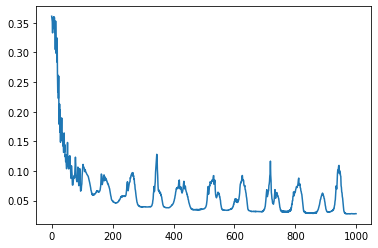

In [223]:
w1,w2,b1,b2 = mlp2train(Basetrain, Labeltrain, w1, w2, b1, b2, 0.000005, 1000)

In [224]:
_,y = mlp2run(Basetrain,w1,w2,b1,b2)
Labels = mlpclass(y)
score,rate = compute_score(Labels, Labeltrain)
print("Training Accuracy: {}".format(rate))

Training Accuracy: 0.9287


In [225]:
_,y = mlp2run(Basetest,w1,w2,b1,b2)
predictions = mlpclass(y)
score,rate = compute_score(predictions, Labeltest)
print("Test Accuracy: {}".format(rate))

Test Accuracy: 0.901
